# Homework 5

In [1]:
import requests
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

In [2]:
!pip uninstall pillow wordcloud -y
!pip install pillow==6.2.2 wordcloud==1.8.1

Found existing installation: Pillow 6.2.2
Uninstalling Pillow-6.2.2:
  Successfully uninstalled Pillow-6.2.2
Found existing installation: wordcloud 1.8.1
Uninstalling wordcloud-1.8.1:
  Successfully uninstalled wordcloud-1.8.1
  Using cached Pillow-6.2.2-cp38-cp38-macosx_10_9_x86_64.whl (2.1 MB)
  Using cached wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.2 requires pillow>=7.1.0, but you have pillow 6.2.2 which is incompatible.


In [3]:
import PIL
import wordcloud

## REST API

### Extract all the prize motivations from the JSON-list and visualise the frequencies using a word cloud

In [11]:
url = 'http://api.nobelprize.org/2.1/nobelPrizes?limit=125&nobelPrizeYear=1901&yearTo=2024&nobelPrizeCategory=phy&format=json'
response = requests.get(url)
nobel_data = response.json()

# Extrahera motiveringar från JSON-data
motivations = " ".join(
    prize["laureates"][0]["motivation"]["en"]
    for prize in nobel_data["nobelPrizes"]
    if "laureates" in prize and "motivation" in prize["laureates"][0]
)

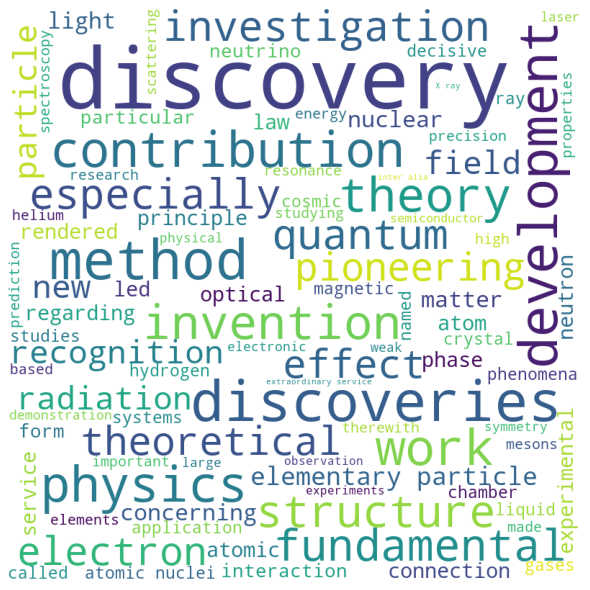

In [12]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=800, 
    height=800, 
    background_color='white', 
    stopwords=stopwords, 
    min_font_size=10
).generate(motivations)

# Plot WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Web Scraping

In [15]:
from bs4 import BeautifulSoup

In [16]:
url1 = "https://books.toscrape.com/catalogue/page-1.html"
url2 = "https://books.toscrape.com/catalogue/page-2.html"
url3 = "https://books.toscrape.com/catalogue/page-3.html"
urls = [url1, url2, url3]

In [17]:
books_df = pd.DataFrame(columns=["upc", "title", "price", "rating"])

In [9]:
def web_scraping(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")  
    
    books = soup.find_all("article", class_="product_pod") # hitta alla böcker på sidan
    for i in books:
        title = i.h3.a["title"] 
        
        price = i.find("p", class_="price_color").text.strip()
        
        rating = i.p["class"][1]
        
        book_url = "https://books.toscrape.com/catalogue/" + i.h3.a["href"] # länk till detaljsidan
        book_response = requests.get(book_url)
        book_soup = BeautifulSoup(book_response.text, "html.parser")
        
        upc = book_soup.find("th", text="UPC").find_next_sibling("td").text # Hämta UPC från tabellen
        books_df.loc[len(books_df)] = [upc, title, price, rating]

In [10]:
for url in urls:
    web_scraping(url)

books_df

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,Â£51.77,Three
1,90fa61229261140a,Tipping the Velvet,Â£53.74,One
2,6957f44c3847a760,Soumission,Â£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,Â£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,Â£54.23,Five
5,f77dbf2323deb740,The Requiem Red,Â£22.65,One
6,2597b5a345f45e1b,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,Four
7,e72a5dfc7e9267b2,The Coming Woman: A Novel Based on the Life of...,Â£17.93,Three
8,e10e1e165dc8be4a,The Boys in the Boat: Nine Americans and Their...,Â£22.60,Four
9,1dfe412b8ac00530,The Black Maria,Â£52.15,One
